# Полиномиальная регрессия

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Данные о машинах

In [46]:
data = sns.load_dataset('mpg')

In [47]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [48]:
data.dropna(inplace=True)

## Линейная модель

In [49]:
X = data['horsepower']
Y = data['mpg']

In [50]:
X = sm.add_constant(X)

In [51]:
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        08:47:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [52]:
predictions_lin = results_lin.predict()

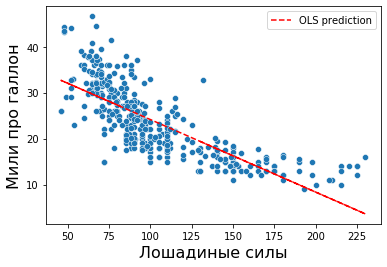

In [53]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='horsepower', y='mpg')
ax.plot(X['horsepower'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Лошадиные силы',size=16)
ax.set_ylabel('Мили про галлон',size=16)
ax.legend(loc="best")
#fig.savefig('mpg_linear.png')

Существует явная взаимосвязь между расходом топлива на галлон и мощностью в лошадиных силах, но кажется очевидным, что эта взаимосвязь на самом деле нелинейна: данные указывают на кривую взаимосвязь.

## Полиномиальная регрессия

In [54]:
X['horsepower^2'] = X['horsepower']*X['horsepower']

In [55]:
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           5.40e-99
Time:                        08:47:47   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604   

In [66]:
X = X.sort_values('horsepower')

In [68]:
predictions_lin = results_lin.predict(X[['const','horsepower']])

In [69]:
predictions_poly = results_poly.predict(X)

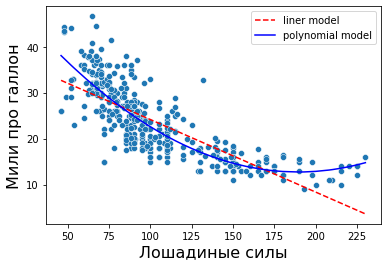

In [73]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='horsepower', y='mpg')
ax.plot(X['horsepower'], predictions_lin, 'r--', label="liner model")
ax.plot(X['horsepower'], predictions_poly, 'b', label="polynomial model")
ax.set_xlabel('Лошадиные силы',size=16)
ax.set_ylabel('Мили про галлон',size=16)
ax.legend(loc="best")
fig.savefig('mpg_polynomial.png')

## Residual plots

In [75]:
data = data.sort_values('horsepower')

In [76]:
residuals_lin = data['mpg'] - predictions_lin

In [78]:
residuals_poly =  data['mpg'] - predictions_poly

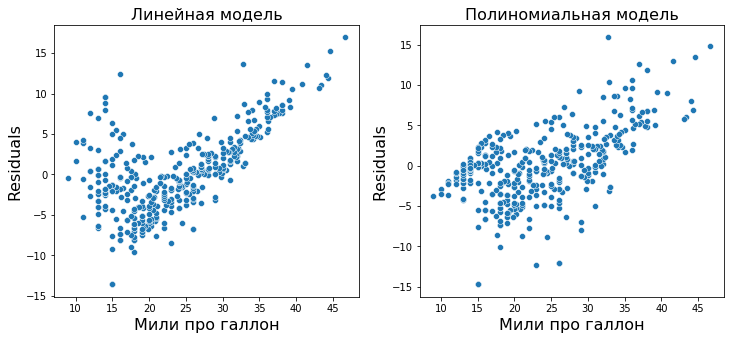

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.scatterplot(ax=ax[0],x=data['mpg'], y=residuals_lin)
sns.scatterplot(ax=ax[1],x=data['mpg'], y=residuals_poly)
ax[0].set_xlabel('Мили про галлон',size=16)
ax[0].set_ylabel('Residuals',size=16)
ax[0].set_title('Линейная модель',size=16)
ax[1].set_title('Полиномиальная модель',size=16)
ax[1].set_xlabel('Мили про галлон',size=16)
ax[1].set_ylabel('Residuals',size=16)
fig.savefig('residual_plots.png')